<h2><b>Analisis Pola dan Pengelompokan Tingkat Banjir DKI Jakarta dengan K-Means Clustering</b></h1>

<h2><b>Nama Tim: INFINITY</b></h1>
<h2><b>Anggota:
<ul>
<li>Balqis Dwian Fitri Zamzami</li>
<li>Khoirul Amar Sidik</li>
<li>Mujadid Choirus Surya</li>
</ul>
</b></h2>

<h2><b>Dataset: <a href="https://data.jakarta.go.id/dataset?q=banjir"></b>dataset</a></h2>

<h2><b>Dasboard Tableau: <a href="https://bit.ly/INFINITY-TABLEAU"></b>LiveDasboard</a></h2>

<h2><b>Problem Statement</b></h1>

Data Kejadian Bencana Banjir di Provinsi DKI Jakarta Tahun 2020. Dataset ini berisi tentang Data Rekapitulasi Bulanan Kejadian Banjir di Provinsi DKI Jakarta Tahun 2020.

Tujuan kita adalah menganalisis, memvisualisasikan dan melakukan pengelompokan tingkat banjir di Jakarta untuk mendapatkan wawasan yang berguna dalam penanggulangan banjir di masa depan. Beberapa analisis yang ingin kita lakukan antara lain :
<ul>
<li>Menampilkan distribusi data berdasarkan kota administrasi, kecamatan, dan kelurahan untuk mendapatkan ringkasan jumlah jiwa terdampak, jumlah tempat pengungsian, dan lama genangan. Dari hasil pengelompokan ini, kita dapat mengidentifikasi daerah-daerah yang paling terdampak dan membutuhkan perhatian lebih dalam upaya penanggulangan banjir.</li>
<li>Menampilkan grafik garis untuk menunjukkan tren tinggi rata-rata ketinggian air, puncak kejadian banjir setiap bulan selama tahun 2020 di berbagai lokasi di Jakarta. Hal ini akan membantu kita dalam mengidentifikasi pola dan periode tertentu di mana banjir lebih sering terjadi.</li>
<li>Menggunakan algoritma K-Means untuk melakukan clustering pada data berdasarkan atribut-atribut yang relevan seperti tinggi rata-rata ketinggian air, jumlah jiwa terdampak, jumlah tempat pengungsian, dan lama genangan. Hal ini akan membantu kita mengidentifikasi kelompok-kelompok daerah yang memiliki karakteristik serupa dalam hal dampak banjir, sehingga mempermudah dalam perencanaan dan pengambilan keputusan.</li>
<li>Menampilkan visualisasi grafik batang dan melakukan evaluasi model untuk membandingkan nilai atribut-atribut yang relevan antara kelompok-kelompok hasil clustering. Dengan demikian, kita dapat memperoleh pemahaman yang lebih jelas tentang perbedaan dan persamaan antara kelompok-kelompok daerah dalam hal dampak banjir.</li>
</ul>

Dengan menganalisis, memvisualisasikan dan melakukan pengelompokan tingkat banjir di Jakarta tahun 2020, diharapkan kita dapat memperoleh wawasan yang lebih baik tentang pola, tingkat dampak, dan karakteristik banjir di berbagai lokasi di Jakarta. Informasi ini dapat digunakan sebagai dasar untuk mengambil tindakan pencegahan dan mitigasi yang lebih efektif guna mengurangi dampak buruk banjir di masa depan.

## 1. Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import collections
import datetime
from collections import Counter
from wordcloud import WordCloud

## 2. Import dataset

In [ ]:
# List data banjir tahun 2020
lst_data = [
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/caf1c2f6d362a0dfb31107b5ad8a2d30/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-November.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/616a219e6e41fe009713b0b4d45d4c57/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Oktober.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/15b387b250e1dbf04f7384ca3dde945a/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-September.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/d2280ec40f970e004c9f29644a41900c/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Agustus.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/e3299fa5cf7de35a393a3ef317743e07/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Juli.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/3b79c2944f6214d0dbf4bc6c3d63cbc7/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Juni.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/e67258aa002d4ee52a8bc64421c1e4b3/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Mei.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/445d265ac4bee1024909b1eb49170617/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-April.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/2cfae39074177810714d4923dd6c6092/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Maret.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/fb9cc34edc46e7bcdf78b1a2df05ebf6/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Februari.csv',
            'https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/22b62d11e65072196c385de24b570d6f/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Januari.csv'
            ]

In [ ]:
#base dataset Desember 2020
df_base = pd.read_csv('https://data.jakarta.go.id/dataset/26ae6b299f962843c7e67e5e6421218b/resource/6cb85e9949ee90c7a23a5bf3a45a2591/download/Data-Kejadian-Bencana-Banjir-di-Provinsi-DKI-Jakarta-Tahun-2020-Bulan-Desember.csv')
df_base['Tahun'] = '2020'
df_base['Bulan'] = 'Desember'

In [ ]:
df_base.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,Tahun,Bulan
0,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,RW : 002,1,1,0,0,20 cm,2020-12-07,0,0,0,0,0,0,0,0,2020,Desember
1,Jakarta Barat,KEMBANGAN,SRENGSENG,RW : 008,1,1,0,0,25 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,Desember
2,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,Desember
3,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,Desember
4,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,RW : 005,1,1,25,70,40 cm,2020-12-06,0,0,0,0,0,0,0,0,2020,Desember


## 3. Preprocessing Dataset

In [ ]:
#concate semua dataset
for i in range(len(lst_data)):
  data = pd.read_csv(lst_data[i])
  data['Tahun'] = lst_data[i]
  data['Tahun'] = data['Tahun'].apply(lambda st: st[st.find("Tahun-")+6:st.find("-Bulan")]).astype(int)
  data['Bulan'] = lst_data[i]
  data['Bulan'] = data['Bulan'].apply(lambda st: st[st.find("Bulan-")+6:st.find(".csv")])
  df_base = pd.concat([df_base, data])
  i+1

In [ ]:
# fungsi membersihkan bulan
def processkata(kata):
    replace_jan = ['Januari']
    kata = re.sub(r'|'.join(map(re.escape, replace_jan)), '1', kata)
    replace_feb = ['Februari']
    kata = re.sub(r'|'.join(map(re.escape, replace_feb)), '2', kata)
    replace_maret = ['Maret']
    kata = re.sub(r'|'.join(map(re.escape, replace_maret)), '3', kata)
    replace_aprl = ['April']
    kata = re.sub(r'|'.join(map(re.escape, replace_aprl)), '4', kata)
    replace_mei = ['Mei']
    kata = re.sub(r'|'.join(map(re.escape, replace_mei)), '5', kata)
    replace_jun = ['Juni']
    kata = re.sub(r'|'.join(map(re.escape, replace_jun)), '6', kata)
    replace_jul = ['Juli']
    kata = re.sub(r'|'.join(map(re.escape, replace_jul)), '7', kata)
    replace_ags = ['Agustus']
    kata = re.sub(r'|'.join(map(re.escape, replace_ags)), '8', kata)
    replace_sep = ['September']
    kata = re.sub(r'|'.join(map(re.escape, replace_sep)), '9', kata)
    replace_okt = ['Oktober']
    kata = re.sub(r'|'.join(map(re.escape, replace_okt)), '10', kata)
    replace_nov = ['November']
    kata = re.sub(r'|'.join(map(re.escape, replace_nov)), '11', kata)
    replace_des = ['Desember']
    kata = re.sub(r'|'.join(map(re.escape, replace_des)), '12', kata)
    return kata

In [ ]:
# Implementasi fungsi sebelumnya
df_base['Bulan'] = df_base['Bulan'].apply(processkata).astype(int)

In [ ]:
# fungsi pembersihan kelurahan
def processkelurahan(kata):
    replace_jan = ['KEL. ']
    kata = re.sub(r'|'.join(map(re.escape, replace_jan)), '', kata)
    return kata

In [ ]:
# Implementasi fungsi sebelumnya
df_base['kelurahan'] = df_base['kelurahan'].apply(processkelurahan)

In [ ]:
df_base.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,Tahun,Bulan
0,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,RW : 002,1,1,0,0,20 cm,2020-12-07,0,0,0,0,0,0,0,0,2020,12
1,Jakarta Barat,KEMBANGAN,SRENGSENG,RW : 008,1,1,0,0,25 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
2,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
3,Jakarta Barat,KEMBANGAN,SRENGSENG,0,0,1,0,0,30 cm,2020-12-31,0,0,0,0,0,0,0,0,2020,12
4,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,RW : 005,1,1,25,70,40 cm,2020-12-06,0,0,0,0,0,0,0,0,2020,12


In [ ]:
#dataset yang sudah dibersihkan
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           1006 non-null   object
 1   kecamatan                   1006 non-null   object
 2   kelurahan                   1006 non-null   object
 3   rw                          1006 non-null   object
 4   jumlah_terdampak_rw         1006 non-null   int64 
 5   jumlah_terdampak_rt         1006 non-null   int64 
 6   jumlah_terdampak_kk         1006 non-null   object
 7   jumlah_terdampak_jiwa       1006 non-null   int64 
 8   ketinggian_air              1006 non-null   object
 9   tanggal_kejadian            1006 non-null   object
 10  lama_genangan               1006 non-null   int64 
 11  jumlah_meninggal            1006 non-null   int64 
 12  jumlah_hilang               1006 non-null   int64 
 13  jumlah_luka_berat           1006 non-null   int64

In [ ]:
# drop data yang tidak dipakai
df = df_base.drop(['rw', 'jumlah_meninggal', 'jumlah_hilang',
       'jumlah_luka_berat', 'nilai_kerugian'], axis = 1)

In [ ]:
# pembersiahn data ketinggian air
df['min_ketinggian'] = df['ketinggian_air'].str[:2].astype(int)
df['max_ketinggian'] = df['ketinggian_air'].str[2:]
df['max_ketinggian'] = df['max_ketinggian'].str.extract('(\d+)')
df['max_ketinggian'] = df['max_ketinggian'].fillna(df['min_ketinggian']).astype(int)
df['avg_ketinggian'] = (df['min_ketinggian']+df['max_ketinggian'])/2

df = df.drop(['ketinggian_air'], axis = 1)

In [ ]:
# replace beberapa kota_administrasi yang sesuai
df.loc[(df['kecamatan'] == 'KALIDERES') | (df['kecamatan'] == 'GROGOL PETAMBURAN') |
       (df['kecamatan'] == 'KEMBANGAN') | (df['kecamatan'] == 'CENGKARENG'), 'kota_administrasi'] = 'Jakarta Barat'

df.loc[df['kecamatan'] == 'PENJARINGAN', 'kota_administrasi'] = 'Jakarta Utara'

print(f"Jakarta Barat : {df[df['kota_administrasi'] == 'Jakarta Barat']['kecamatan'].unique()}")
print(f"Jakarta Utara : {df[df['kota_administrasi'] == 'Jakarta Utara']['kecamatan'].unique()}")

Jakarta Barat : ['KEBON JERUK' 'KEMBANGAN' 'KALIDERES' 'CENGKARENG' 'PALMERAH'
 'GROGOL PETAMBURAN' 'TAMBORA' 'TAMAN SARI']
Jakarta Utara : ['PENJARINGAN' 'CILINCING' 'PADEMANGAN' 'TANJUNG PRIOK' 'KOJA'
 'KELAPA GADING' 'CILIINCING']


In [ ]:
df['kota_administrasi'] = df['kota_administrasi'].replace('Jakarta Urata', 'Jakarta Utara')
df['kota_administrasi'] = df['kota_administrasi'].str.strip()

In [ ]:
# add column 'terjadi_banjir' untuk mengetahui jumlah banjir berdasarkan tgl kejadian
df['tanggal_kejadian'] = df['tanggal_kejadian'].replace('tgl.', '',regex=True)
df['terjadi_banjir'] = df['tanggal_kejadian'].str.split(',').apply(lambda x: len(x))

In [ ]:
df.head()

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,Tahun,Bulan,min_ketinggian,max_ketinggian,avg_ketinggian,terjadi_banjir
0,Jakarta Barat,KEBON JERUK,KEDOYA UTARA,1,1,0,0,2020-12-07,0,0,0,0,2020,12,20,20,20.0,1
1,Jakarta Barat,KEMBANGAN,SRENGSENG,1,1,0,0,2020-12-31,0,0,0,0,2020,12,25,25,25.0,1
2,Jakarta Barat,KEMBANGAN,SRENGSENG,0,1,0,0,2020-12-31,0,0,0,0,2020,12,30,30,30.0,1
3,Jakarta Barat,KEMBANGAN,SRENGSENG,0,1,0,0,2020-12-31,0,0,0,0,2020,12,30,30,30.0,1
4,Jakarta Selatan,PASAR MINGGU,PEJATEN TIMUR,1,1,25,70,2020-12-06,0,0,0,0,2020,12,40,40,40.0,1


In [ ]:
#Agregating atau grouing data
df['tanggal'] = df['Tahun'].astype(str) +'-'+df['Bulan'].astype(str)
df['tanggal'] = pd.to_datetime(df['tanggal']).dt.strftime('%Y-%m')

df1 = df.groupby(by=['tanggal', 'kota_administrasi', 'kecamatan', 'kelurahan'], dropna=False).agg({'avg_ketinggian':'mean','jumlah_terdampak_jiwa':'sum', 'jumlah_tempat_pengungsian' : 'sum', 'lama_genangan' : 'sum'}).reset_index()

In [ ]:
df1.to_csv('agregat.csv')

In [ ]:
df1 = pd.read_csv('/content/agregat.csv')
df1 = df1.drop(['Unnamed: 0'], axis = 1)
df1.head()

,tanggal,kota_administrasi,kecamatan,kelurahan,avg_ketinggian,jumlah_terdampak_jiwa,jumlah_tempat_pengungsian,lama_genangan
0,2020-01,Jakarta Barat,CENGKARENG,CENGKARENG BARAT,50.5,2220,0,0
1,2020-01,Jakarta Barat,CENGKARENG,CENGKARENG TIMUR,40.0,362,0,1
2,2020-01,Jakarta Barat,CENGKARENG,DURI KOSAMBI,110.5,1230,0,1
3,2020-01,Jakarta Barat,CENGKARENG,KAPUK,50.5,4461,0,1
4,2020-01,Jakarta Barat,CENGKARENG,KEDAUNG KALI ANGKE,50.5,2804,0,0


## 4. Exploratory Data Analysis

### Statistika Deskriptif

In [ ]:
df1.describe()

,avg_ketinggian,jumlah_terdampak_jiwa,jumlah_tempat_pengungsian,lama_genangan
count,603.000000,603.000000,603.000000,603.000000
mean,43.398380,250.854063,0.019900,0.031509
std,28.668943,873.885891,0.206864,0.192903
min,1.500000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000
50%,35.000000,0.000000,0.000000,0.000000
75%,55.000000,88.000000,0.000000,0.000000
max,180.000000,13450.000000,3.000000,2.000000


### Kota yang sering terjadi bencana banjir

In [ ]:
df_pie_label = df.groupby('kota_administrasi', as_index=False)[['terjadi_banjir']].sum()

fig = px.pie(df_pie_label, values='terjadi_banjir', names='kota_administrasi',
color_discrete_sequence=px.colors.sequential.Blues_r,
hole=0.4)

fig.update_layout(height=500, width=700, showlegend=True)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [ ]:
df_histogram = df.groupby('kota_administrasi', as_index=False)[['terjadi_banjir']].sum()

fig = px.histogram(df_histogram, x='kota_administrasi', y='terjadi_banjir',
                   color='kota_administrasi',
                   color_discrete_sequence=px.colors.sequential.Blues_r)

fig.update_layout(height=500, width=700, showlegend=True)
fig.update_yaxes(title_text='Jumlah Terjadi Banjir')

for i in range(len(df_histogram)):
    fig.add_annotation(x=df_histogram['kota_administrasi'][i], y=df_histogram['terjadi_banjir'][i],
                       text=str(df_histogram['terjadi_banjir'][i]),
                       showarrow=False, font=dict(color='black'),
                       xshift=10, yshift=5)

fig.show()

### Top 10 Jumlah Kejadian Bencana Banjir Berdasarkan Kelurahan

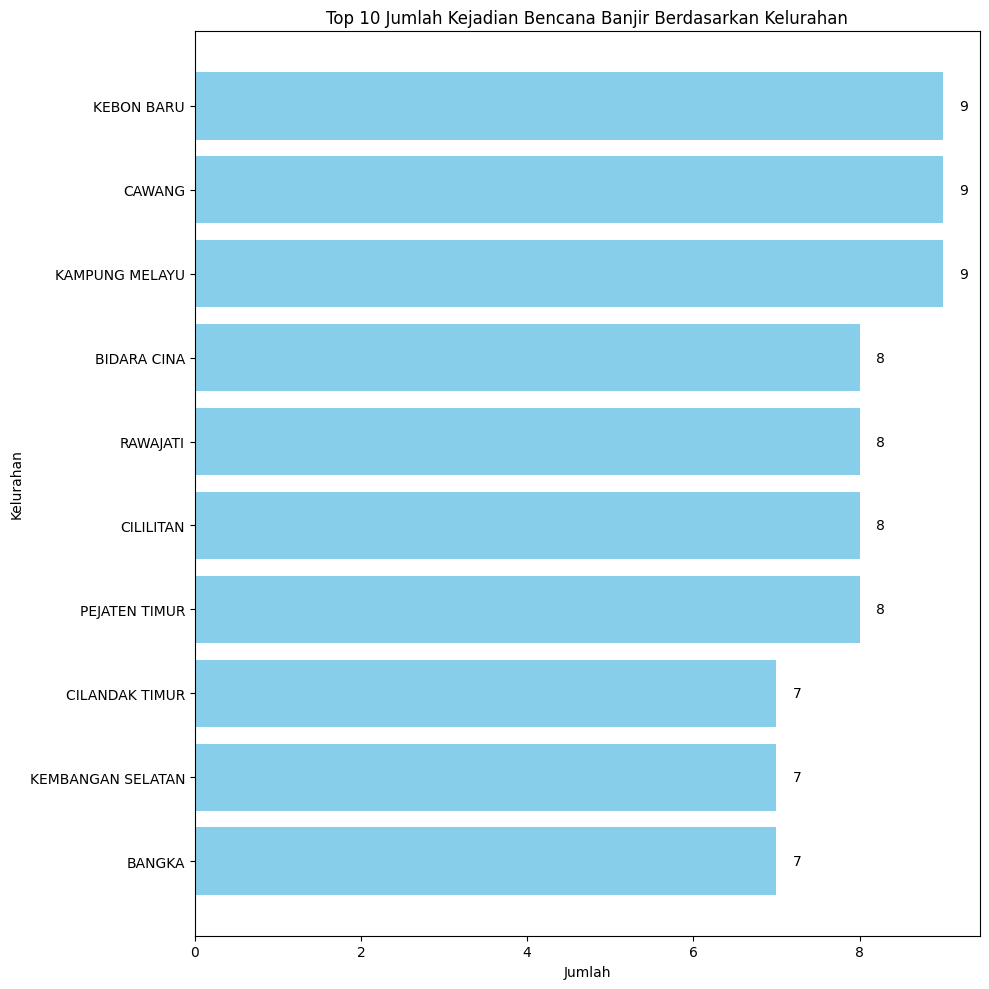

In [ ]:
top_10_kelurahan = df1['kelurahan'].value_counts().iloc[:10]

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(top_10_kelurahan.index, top_10_kelurahan.values, color='skyblue')

for i, v in enumerate(top_10_kelurahan.values):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

ax.invert_yaxis()
ax.set_xlabel("Jumlah")
ax.set_ylabel("Kelurahan")
ax.set_title("Top 10 Jumlah Kejadian Bencana Banjir Berdasarkan Kelurahan")

plt.tight_layout()
plt.show()

### Banyak kejadian banjir setiap bulan tahun 2020 di Jakarta

In [ ]:
df_new = df1['tanggal'].value_counts().rename_axis('tanggal').reset_index(name='counts')
df_new['tanggal'] = pd.to_datetime(df_new['tanggal'])

In [ ]:
df_tgl = df_new.set_index('tanggal').sort_index().resample('MS').asfreq().fillna(0)

In [ ]:
fig = px.line(df_tgl, x=df_tgl.index, y=df_tgl.columns[0], labels={'x':'Tanggal', 'y':'Data'})
fig.update_traces(mode='lines+markers', hovertemplate='Tanggal: %{x}<br>Data: %{y}')
fig.show()

### Ketinggian air maksimal dan minimal berdasarkan kota

In [ ]:
df_bar = df.groupby('kota_administrasi', as_index=False)[['max_ketinggian']].max()
fig_bar = px.bar(df_bar, x='kota_administrasi', y=['max_ketinggian'],
                        color_discrete_sequence = px.colors.sequential.Blues_r, color='kota_administrasi',
                        title = f'Maksimal Ketinggian Air per Kota Administrasi', text_auto=True)
fig_bar.update_xaxes(title = '')
fig_bar.update_yaxes(title = 'Nilai Maksimal')
fig_bar.show()

In [ ]:
df_bar = df.groupby('kota_administrasi', as_index=False)[['min_ketinggian']].min()
fig_bar = px.bar(df_bar, x='kota_administrasi', y=['min_ketinggian'],
                        color_discrete_sequence = px.colors.sequential.Blues_r, color='kota_administrasi',
                        title = 'Minimal Ketinggian Air per Kota Administrasi', text_auto=True)
fig_bar.update_xaxes(title = '')
fig_bar.update_yaxes(title = 'Nilai Minimal')
fig_bar.show()

### Menampilkan persebaran data kolom "avg_ketinggian" menggunakan Box Plot

<Axes: >

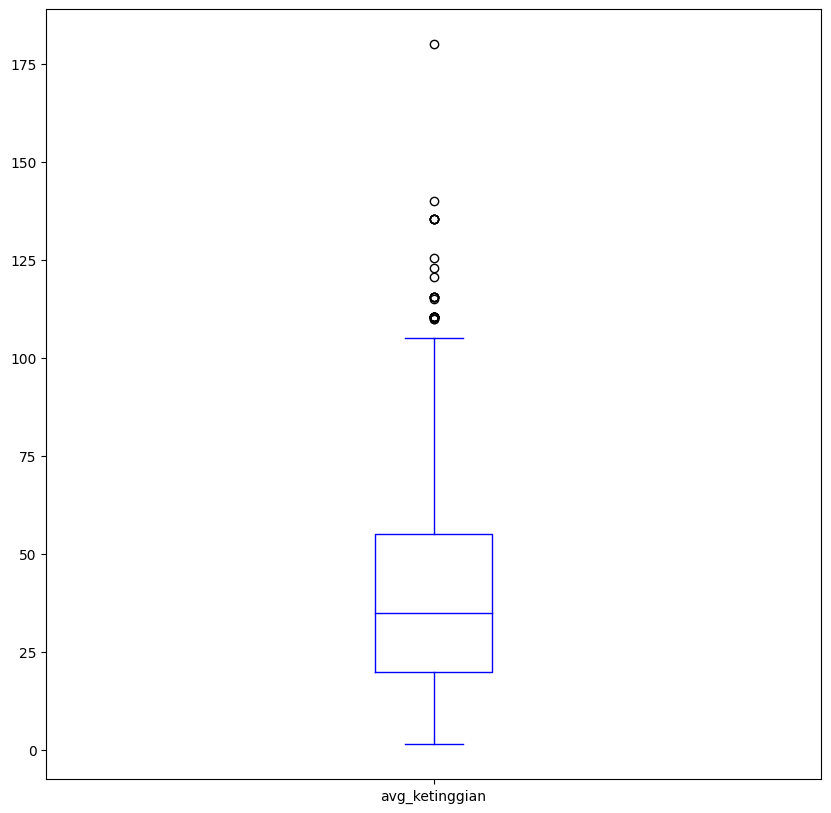

In [ ]:
df1['avg_ketinggian'].plot(kind='box',color='blue', figsize=(10,10))

### Menampilkan hubungan atau pola antara 'jumlah_terdampak_jiwa' dan 'avg_ketinggian' menggunakan scatter plot

<Axes: xlabel='jumlah_terdampak_jiwa', ylabel='avg_ketinggian'>

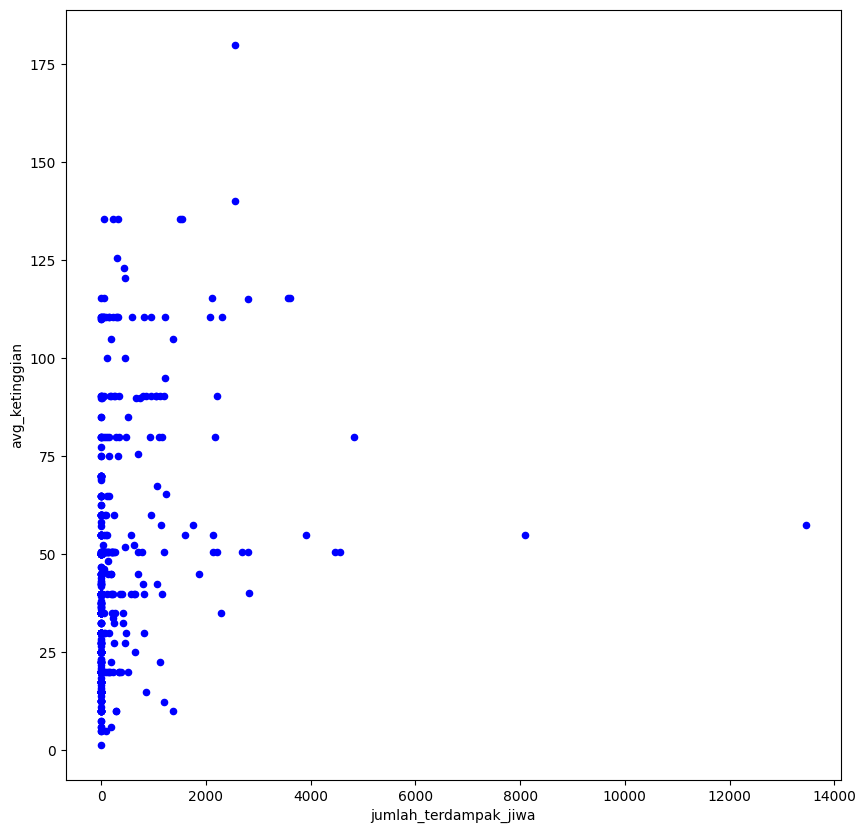

In [ ]:
df1[['jumlah_terdampak_jiwa','avg_ketinggian']].plot(kind='scatter', x = 'jumlah_terdampak_jiwa', y = 'avg_ketinggian', figsize=(10,10), color = 'blue')

### Menampilkan korelasi antara variabel 'jumlah_terdampak_jiwa', 'avg_ketinggian', 'lama_genangan' dan 'jumlah_tempat_pengungsian'.

<Axes: >

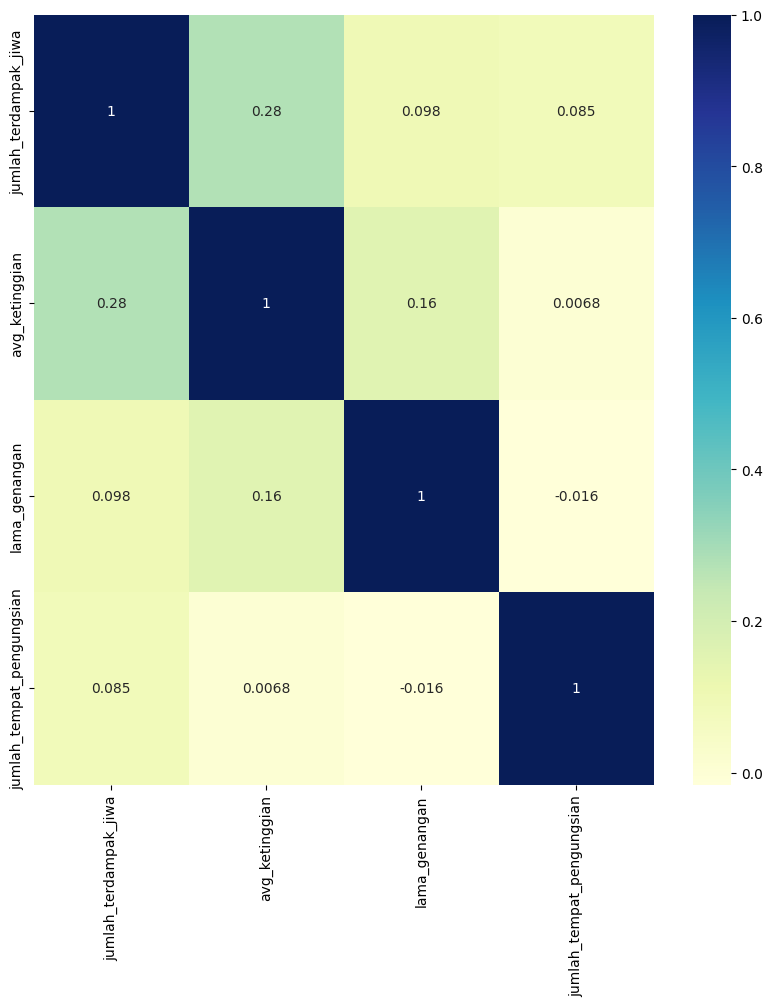

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1[['jumlah_terdampak_jiwa','avg_ketinggian','lama_genangan','jumlah_tempat_pengungsian']].corr(), annot=True,  cmap="YlGnBu")

## 5. Modeling

### K-means Clustering Tingkat Bencana Banjir 2020

In [ ]:
df2 = df1[df1['tanggal'].str.contains('2020')]
df2 = df2.groupby(by=['kota_administrasi','kecamatan', 'kelurahan'], dropna=False).agg({'avg_ketinggian':'mean','jumlah_terdampak_jiwa':'sum', 'jumlah_tempat_pengungsian' : 'sum', 'lama_genangan' : 'sum'})[1:].reset_index()
df2_drop = df2.drop(['kota_administrasi','kecamatan', 'kelurahan'],axis=1)

sil_score_kmeans = []
chs_index_kmeans = []
dbs_index_kmeans = []
kmax = 5

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df2_drop)
    labels = kmeans.labels_
    sil_score_kmeans.append(silhouette_score(df2_drop, labels, metric = 'euclidean'))

fig = px.line(x=range(2, kmax+1), y=sil_score_kmeans, labels={'x':'Number of clusters', 'y':'Silhouette Score'})
fig.update_layout(title='The Silhouette Score of K-Means', xaxis=dict(tickmode='linear'))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



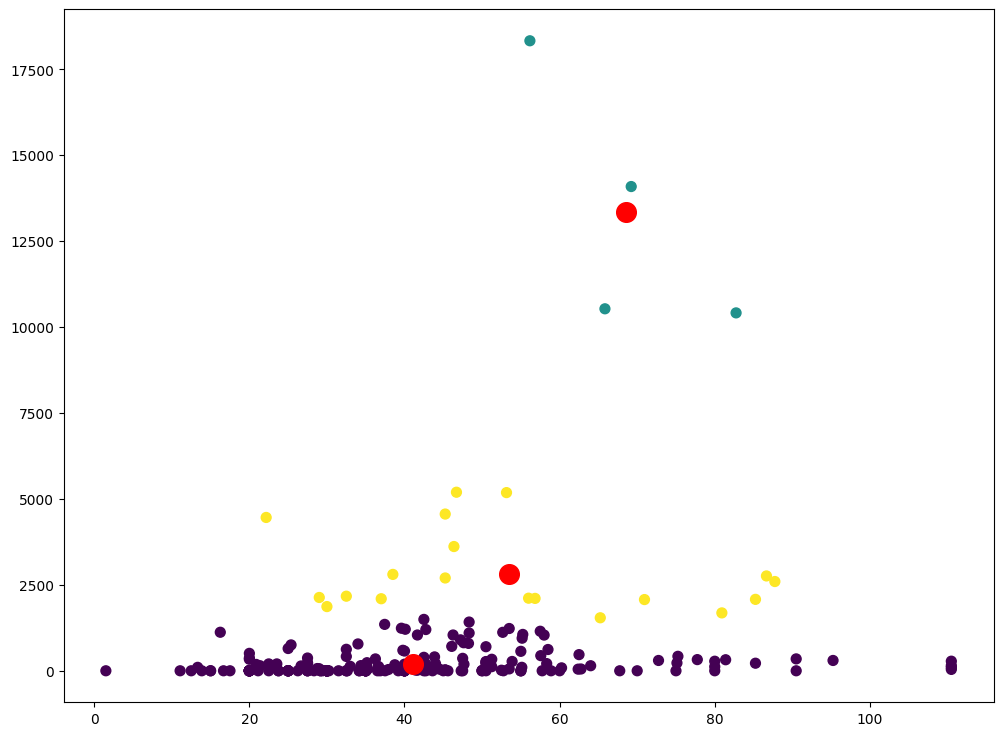

In [ ]:
# K-Means clustering tahun 2020
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2_drop)
y_kmeans = kmeans.predict(df2_drop)

plt.figure(figsize=(12, 9))
plt.scatter(df2_drop['avg_ketinggian'], df2_drop['jumlah_terdampak_jiwa'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)

In [ ]:
df2['cluster'] = pd.Series(y_kmeans, index=df2.index)
df2_thn2020 = df2.copy()

In [ ]:
df2 = df2.drop(['kota_administrasi', 'kecamatan','kelurahan'], axis = 1)

In [ ]:
num = df2.columns[:]

def cl(n):
    value = []
    for i in num:
        value.append(df2.loc[df2['cluster']==n,:].describe().loc['mean',i])
    return value

In [ ]:
num

Index(['avg_ketinggian', 'jumlah_terdampak_jiwa', 'jumlah_tempat_pengungsian',
       'lama_genangan', 'cluster'],
      dtype='object')

In [ ]:
df2.loc[df2['cluster'] == 2, 'cluster'] = 3
df2.loc[df2['cluster'] == 1, 'cluster'] = 2
df2.loc[df2['cluster'] == 0, 'cluster'] = 1

In [ ]:
cluster_1 = cl(1)
cluster_2 = cl(2)
cluster_3 = cl(3)

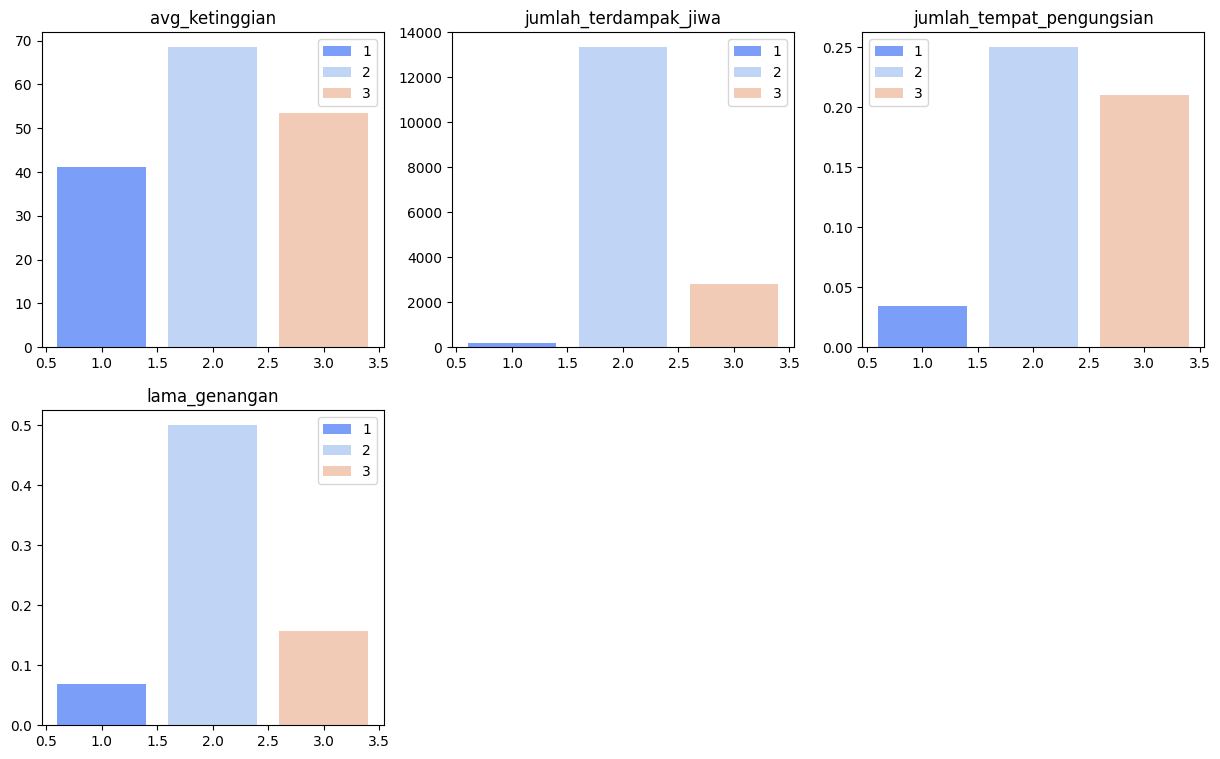

In [ ]:
x = 0
w = 1
plt.figure(figsize=(15, 9))
label = ['avg_ketinggian', 'jumlah_terdampak_jiwa', 'jumlah_tempat_pengungsian', 'lama_genangan']
colors = plt.get_cmap('coolwarm')

for i in range(1, 5):
    plt.subplot(2, 3, i)
    fig1 = plt.bar(x + 1, cluster_1[i - 1], color=colors(0.2))
    fig2 = plt.bar(x + w + 1, cluster_2[i - 1], color=colors(0.4))
    fig3 = plt.bar(x + 3 * w, cluster_3[i - 1], color=colors(0.6))
    plt.title(label[i - 1])
    plt.legend(['1', '2', '3', '4'])

plt.show()

Cluster 1 = Ringan. Terjadi pada rata-rata ketinggian kurang dari 60 cm, jumlah terdampak jiwa kurang dari 3000 orang, rata-rata jumlah tempat pengungsian kurang dari 1 dan rata-rata lama genangan kurang dari 1 hari.

Cluster 2 = Sedang. Terjadi pada rata-rata ketinggian kurang dari 50 cm, jumlah terdampak jiwa kurang dari 1000 orang, rata-rata jumlah tempat pengungsian kurang dari 1 dan rata-rata lama genangan kurang dari 1 hari.

Cluster 3 = Berat. Terjadi pada rata-rata ketinggian kurang dari 70 cm, jumlah terdampak jiwa kurang dari 14000 orang, rata-rata jumlah tempat pengungsian kurang dari 1 dan rata-rata lama genangan kurang dari 1 hari.

In [ ]:
df2_thn2020['cluster'] = df2_thn2020['cluster'].replace({0: 1, 1: 2, 2: 3})
df2_thn2020.head(10)

,kota_administrasi,kecamatan,kelurahan,avg_ketinggian,jumlah_terdampak_jiwa,jumlah_tempat_pengungsian,lama_genangan,cluster
0,Jakarta Barat,CENGKARENG,CENGKARENG TIMUR,47.500000,362,0,1,1
1,Jakarta Barat,CENGKARENG,DURI KOSAMBI,53.500000,1230,0,1,1
2,Jakarta Barat,CENGKARENG,KAPUK,22.166667,4461,0,1,3
3,Jakarta Barat,CENGKARENG,KEDAUNG KALI ANGKE,38.500000,2804,0,0,3
4,Jakarta Barat,CENGKARENG,RAWA BUAYA,29.011905,2133,0,0,3
5,Jakarta Barat,GROGOL PETAMBURAN,JELAMBAR,16.666667,0,0,0,1
6,Jakarta Barat,GROGOL PETAMBURAN,JELAMBAR BARU,29.000000,60,0,0,1
7,Jakarta Barat,GROGOL PETAMBURAN,TANJUNG DUREN SELATAN,20.000000,0,0,0,1
8,Jakarta Barat,GROGOL PETAMBURAN,TANJUNG DUREN UTARA,39.375000,85,0,0,1
9,Jakarta Barat,GROGOL PETAMBURAN,TOMANG,45.250000,24,0,0,1


### K- means Clustering Tingkat Bencana Banjir 2020 Menggunakan PCA

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

df3 = df1[df1['tanggal'].str.contains('2020')]
df3 = df3.groupby(by=['kota_administrasi','kecamatan', 'kelurahan'], dropna=False).agg({'avg_ketinggian':'mean','jumlah_terdampak_jiwa':'sum', 'jumlah_tempat_pengungsian' : 'sum', 'lama_genangan' : 'sum'})[1:].reset_index()
df3_drop = df3.drop(['kota_administrasi','kecamatan', 'kelurahan'],axis=1)

X_scaled = preprocessing.scale(df3_drop)
pca = PCA(n_components=2)
df4 = pca.fit_transform(X_scaled)
df4 = pd.DataFrame(df4)

In [ ]:
sil_score_kmeans = []
chs_index_kmeans = []
dbs_index_kmeans = []
kmax = 5

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(df4)
    labels = kmeans.labels_
    sil_score_kmeans.append(silhouette_score(df4, labels, metric='euclidean'))

fig = px.line(x=range(2, kmax+1), y=sil_score_kmeans, labels={'x': 'Number of clusters', 'y': 'Silhouette Score'},
              title='The Silhouette Score of K-Means')
fig.update_layout(height=500, width=700)
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



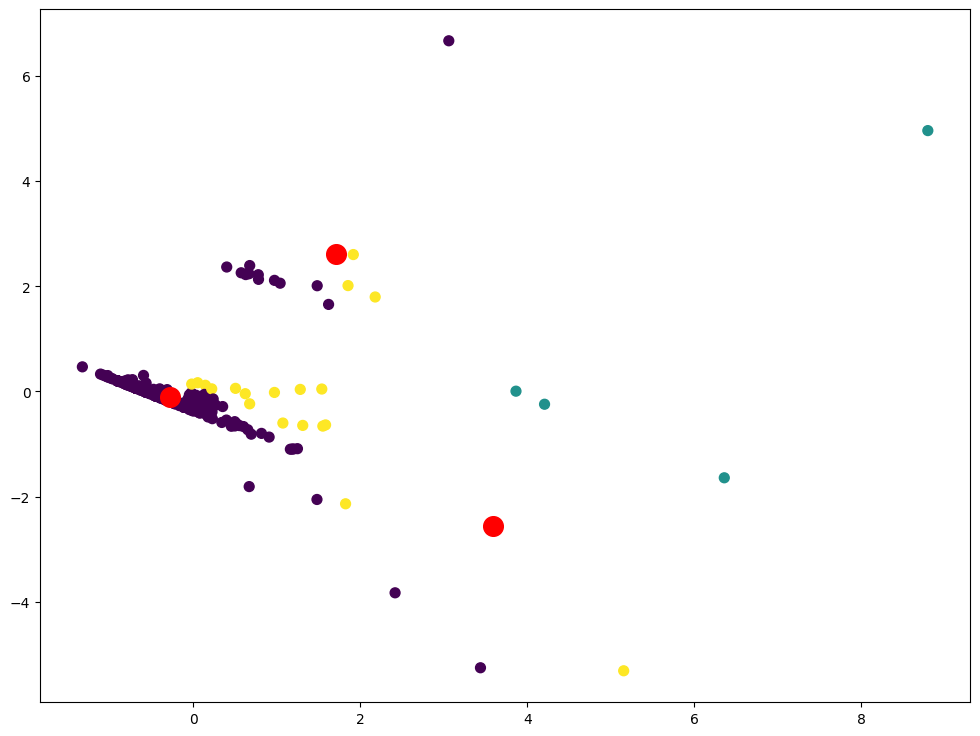

In [ ]:
# K-Means clustering tahun 2020
kmeans = KMeans(n_clusters=3)
kmeans.fit(df4)
y_kmeans_pca = kmeans.predict(df4)

plt.figure(figsize=(12, 9))
plt.scatter(df4.loc[:, 0], df4.loc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)

In [ ]:
df3['cluster'] = pd.Series(y_kmeans_pca, index=df2.index)
df3_thn2020_new = df3.copy()

In [ ]:
df3 = df3.drop(['kota_administrasi', 'kecamatan','kelurahan'], axis = 1)

In [ ]:
num = df3.columns[:]

def cl(n):
    value = []
    for i in num:
        value.append(df3.loc[df3['cluster']==n,:].describe().loc['mean',i])
    return value

In [ ]:
num

Index(['avg_ketinggian', 'jumlah_terdampak_jiwa', 'jumlah_tempat_pengungsian',
       'lama_genangan', 'cluster'],
      dtype='object')

In [ ]:
df3.loc[df3['cluster'] == 2, 'cluster'] = 3
df3.loc[df3['cluster'] == 1, 'cluster'] = 2
df3.loc[df3['cluster'] == 0, 'cluster'] = 1

In [ ]:
cluster_1 = cl(1)
cluster_2 = cl(2)
cluster_3 = cl(3)

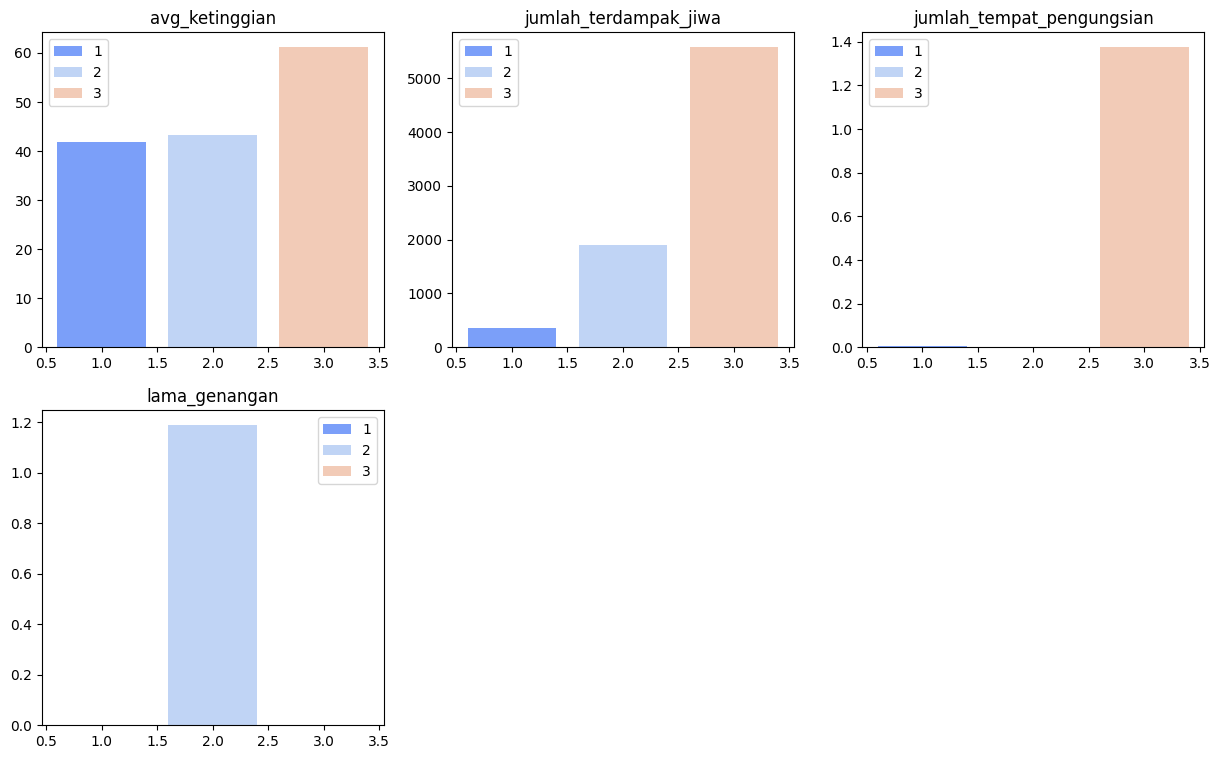

In [ ]:
x = 0
w= 1
plt.figure(figsize=(15,9))
label = ['avg_ketinggian', 'jumlah_terdampak_jiwa', 'jumlah_tempat_pengungsian', 'lama_genangan']
colors = plt.get_cmap('coolwarm')

for i in range(1,5):
    plt.subplot(2, 3, i)
    fig1 = plt.bar(x+1,cluster_1[i-1],color=colors(0.2))
    fig2 = plt.bar(x+w+1,cluster_2[i-1],color=colors(0.4))
    fig3 = plt.bar(x+3*w,cluster_3[i-1],color=colors(0.6))
    plt.title(label[i-1])
    plt.legend(['1','2','3','4'])

plt.show()

Cluster 1 = Ringan. Terjadi pada rata-rata ketinggian kurang dari 50 cm, jumlah terdampak jiwa kurang dari 2000 orang, rata-rata jumlah tempat pengungsian kurang dari 1 dan rata-rata lama genangan kurang dari 2 hari.

Cluster 2 = Sedang. Terjadi pada rata-rata ketinggian kurang dari 50 cm, jumlah terdampak jiwa kurang dari 1000 orang, rata-rata jumlah tempat pengungsian kurang dari 1 dan rata-rata lama genangan kurang dari 1 hari.

Cluster 3 = Berat. Terjadi pada rata-rata ketinggian lebih dari 60 cm, jumlah terdampak jiwa lebih dari 5000 orang, rata-rata jumlah tempat pengungsian kurang dari 2 dan rata-rata lama genangan kurang dari 1 hari.

In [ ]:
df3_thn2020_new['cluster'] = df3_thn2020_new['cluster'].replace({0: 1, 1: 2, 2: 3})
df3_thn2020_new.head(10)

,kota_administrasi,kecamatan,kelurahan,avg_ketinggian,jumlah_terdampak_jiwa,jumlah_tempat_pengungsian,lama_genangan,cluster
0,Jakarta Barat,CENGKARENG,CENGKARENG TIMUR,47.500000,362,0,1,2
1,Jakarta Barat,CENGKARENG,DURI KOSAMBI,53.500000,1230,0,1,2
2,Jakarta Barat,CENGKARENG,KAPUK,22.166667,4461,0,1,2
3,Jakarta Barat,CENGKARENG,KEDAUNG KALI ANGKE,38.500000,2804,0,0,1
4,Jakarta Barat,CENGKARENG,RAWA BUAYA,29.011905,2133,0,0,1
5,Jakarta Barat,GROGOL PETAMBURAN,JELAMBAR,16.666667,0,0,0,1
6,Jakarta Barat,GROGOL PETAMBURAN,JELAMBAR BARU,29.000000,60,0,0,1
7,Jakarta Barat,GROGOL PETAMBURAN,TANJUNG DUREN SELATAN,20.000000,0,0,0,1
8,Jakarta Barat,GROGOL PETAMBURAN,TANJUNG DUREN UTARA,39.375000,85,0,0,1
9,Jakarta Barat,GROGOL PETAMBURAN,TOMANG,45.250000,24,0,0,1


### Evaluasi Model

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluasi Silhouette Coefficient tanpa PCA
silhouette_coefficient = silhouette_score(df2_drop, y_kmeans)
print("Silhouette Coefficient tanpa PCA:", silhouette_coefficient)

# Evaluasi Silhouette Coefficient dengan PCA
silhouette_coefficient = silhouette_score(df4, y_kmeans_pca)
print("Silhouette Coefficient dengan PCA:", silhouette_coefficient)

Silhouette Coefficient tanpa PCA: 0.8236825773131484
Silhouette Coefficient dengan PCA: 0.7454792528215423


Nilai Silhouette Coefficient: Metrik evaluasi untuk mengukur kualitas dan konsistensi pengelompokan dengan memperhitungkan jarak antara titik data dalam kluster yang sama dan kluster yang berbeda.

Dari hasil evaluasi menggunakan Silhouette Coefficient, ditemukan bahwa pengelompokan tanpa menggunakan PCA menghasilkan nilai yang lebih tinggi (0.8217) daripada pengelompokan dengan menggunakan PCA (0.7455). Hal ini menunjukkan bahwa pengelompokan langsung pada dataset asli, tanpa mengurangi dimensi menggunakan PCA, menghasilkan hasil clustering yang lebih baik dalam hal kualitas pengelompokan. Meskipun nilai Silhouette Coefficient dengan PCA masih cukup tinggi, perbedaan yang signifikan antara dua metode menunjukkan keunggulan pengelompokan tanpa menggunakan PCA dalam kasus ini.

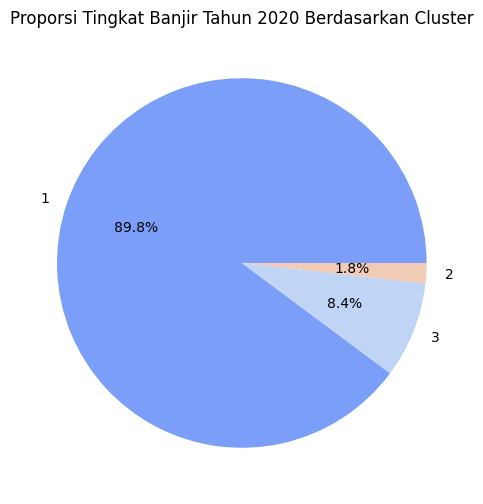

In [ ]:
# Proporsi Tingkat Banjir Tahun 2020 Berdasarkan Cluster tanpa PCA
proporsi = df2_thn2020['cluster'].value_counts(normalize=True)
colors = plt.get_cmap('coolwarm')

plt.figure(figsize=(6, 6))
plt.pie(proporsi, labels=proporsi.index, autopct='%1.1f%%', colors=[colors(0.2), colors(0.4), colors(0.6)])
plt.title('Proporsi Tingkat Banjir Tahun 2020 Berdasarkan Cluster')
plt.show()

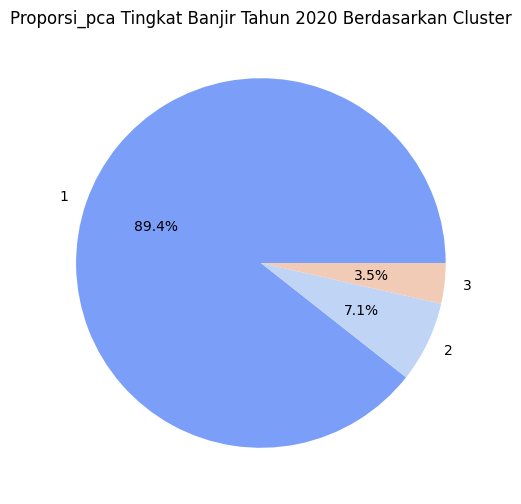

In [ ]:
# Proporsi Tingkat Banjir Tahun 2020 Berdasarkan Cluster dengan PCA
proporsi_pca = df3_thn2020_new['cluster'].value_counts(normalize=True)
colors = plt.get_cmap('coolwarm')

plt.figure(figsize=(6, 6))
plt.pie(proporsi_pca, labels=proporsi_pca.index, autopct='%1.1f%%', colors = [colors(0.2), colors(0.4), colors(0.6)])
plt.title('Proporsi_pca Tingkat Banjir Tahun 2020 Berdasarkan Cluster')
plt.show()